In [1]:
#importing the data and understanding what we are working wtih

import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# get basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NutsID                         11528 non-null  object 
 1   DICOFRE                        11528 non-null  object 
 2   region_name                    11528 non-null  object 
 3   year                           11528 non-null  int64  
 4   edu_none                       11528 non-null  int64  
 5   edu_basic                      11528 non-null  int64  
 6   edu_secondary                  11528 non-null  int64  
 7   edu_superior                   11528 non-null  int64  
 8   labour_family                  11528 non-null  int64  
 9   labour_holder                  11528 non-null  int64  
 10  labour_spouse                  11528 non-null  int64  
 11  labour_other_family            11528 non-null  int64  
 12  labour_non_family              11528 non-null 

In [4]:
# Replace 'area.1' in column names with 'count'
data.columns = [col.replace('area.1', 'count') for col in data.columns]

# Display the updated columns to verify the changes
data.columns.tolist()

# Step 1: Extract the first two digits from the NutsID to create Nuts3ID
data['Nuts3ID'] = data['NutsID'].str[:2]

# Step 2: Map the Nuts3ID to their corresponding Designation values
designation_mapping = {
    '11': 'Norte',
    '16': 'Centro',
    '17': 'Area Metropolitana de Lisboa',
    '18': 'Alentejo',
    '15': 'Algarve'
}
data['Designation'] = data['Nuts3ID'].map(designation_mapping)

data.dropna()

# Display the first few rows to verify the new columns
data.head()


,NutsID,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,labour_holder,...,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings,Nuts3ID,Designation
0,111160101,160101,Aboim das Chocas,2019,15,61,11,7,34,15,...,0,0,1,0,1,0,32,0,11,Norte
1,111160101,160101,Aboim das Chocas,2009,30,57,4,4,50,24,...,0,0,0,0,0,0,29,0,11,Norte
2,111160101,160101,Aboim das Chocas,1999,49,73,7,6,62,26,...,0,0,0,0,0,0,40,0,11,Norte
3,111160101,160101,Aboim das Chocas,1989,167,97,4,0,163,70,...,0,0,0,0,0,1,84,0,11,Norte
4,111160102,160102,Aguia,2019,24,68,5,2,70,38,...,0,0,0,0,0,2,39,0,11,Norte


In [5]:
# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                                 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
                                 'cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                                 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                                 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Melt labour columns
labour_melted = data.melt(id_vars=['year', 'region_name'], value_vars=labour_columns, 
                          var_name='labour_type', value_name='labour_value')

# Melt production columns
production_melted = data.melt(id_vars=['year', 'region_name'], value_vars=production_columns, 
                              var_name='production_type', value_name='production_value')

# Melt education columns
edu_melted = data.melt(id_vars=['year', 'region_name'], value_vars=edu_columns, 
                       var_name='edu_type', value_name='edu_value')

# Melt agricultural activity columns
agriculture_melted = data.melt(id_vars=['year', 'region_name'], value_vars=agricultural_activity_columns, 
                               var_name='agricultural_activity_type', value_name='agricultural_activity_value')


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Define columns for temporary crops, permanent crops, and socio-economic factors
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['region_name', 'year'] + temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the agricultural data
agricultural_columns = temp_crop_columns + perm_crop_columns
scaler = StandardScaler()
data_filtered[agricultural_columns] = scaler.fit_transform(data_filtered[agricultural_columns])

# Prepare the data for LDA
X_ag = data_filtered[agricultural_columns]
y = data_filtered['year']

# Perform LDA
lda_ag = LDA()
X_ag_r2 = lda_ag.fit_transform(X_ag, y)

# Add LDA scores to the original dataset
lda_df_ag = pd.DataFrame(X_ag_r2, columns=[f'DA{i+1}' for i in range(X_ag_r2.shape[1])])
data_filtered = pd.concat([data_filtered.reset_index(drop=True), lda_df_ag.reset_index(drop=True)], axis=1)


In [16]:
# Standardize the socio-economic data
scaler = StandardScaler()
data_filtered[socio_econ_columns] = scaler.fit_transform(data_filtered[socio_econ_columns])

# Prepare the data for LDA
X_se = data_filtered[socio_econ_columns]
y = data_filtered['year']

# Perform LDA
lda_se = LDA()
X_se_r2 = lda_se.fit_transform(X_se, y)

# Add LDA scores to the original dataset
lda_df_se = pd.DataFrame(X_se_r2, columns=[f'DA_se{i+1}' for i in range(X_se_r2.shape[1])])
data_filtered = pd.concat([data_filtered.reset_index(drop=True), lda_df_se.reset_index(drop=True)], axis=1)

# Save the resulting dataset to a new CSV file
data_filtered.head()

data_with_lda_scores = data_filtered

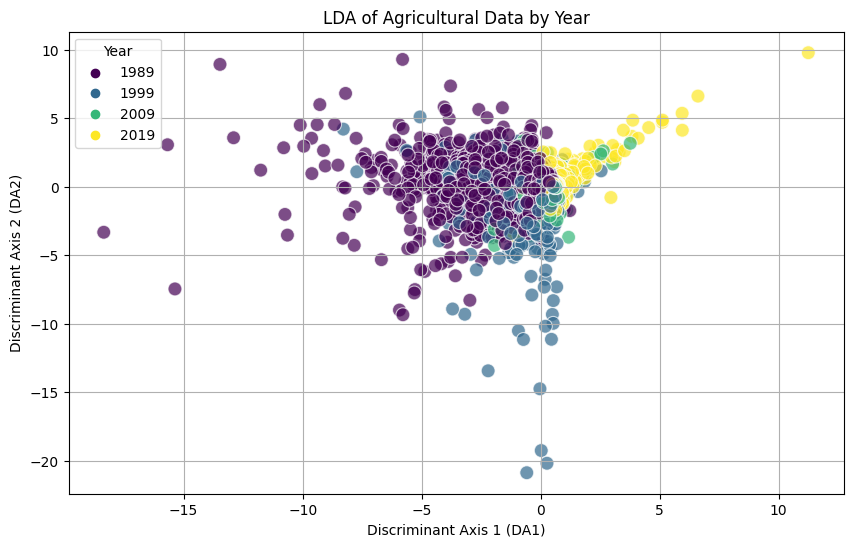

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame with LDA results for agricultural data
agricultural_lda_columns = [col for col in data_with_lda_scores.columns if col.startswith('DA') and not col.startswith('DA_se')]
lda_df_ag = data_with_lda_scores[['year'] + agricultural_lda_columns]

# Plot the first two LDA components for agricultural data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DA1', y='DA2', hue='year', data=lda_df_ag, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

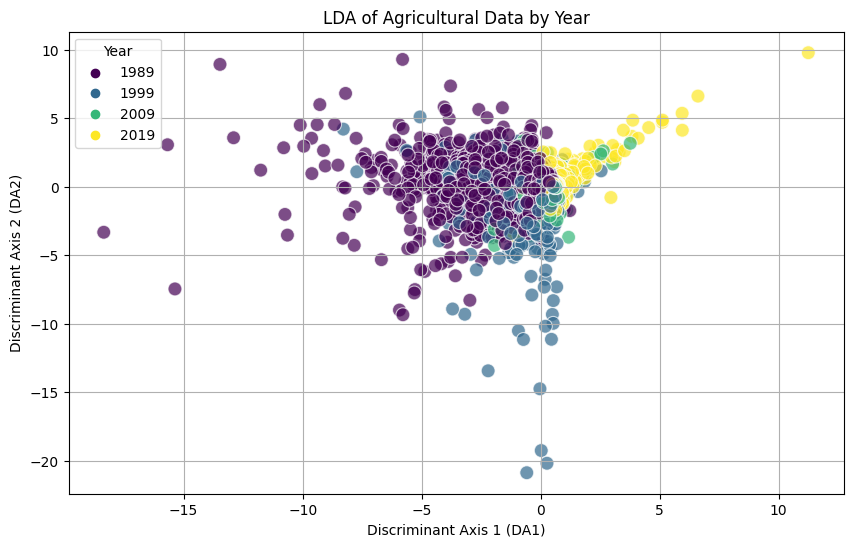

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with LDA results for agricultural data
agricultural_lda_columns = [col for col in data_with_lda_scores.columns if col.startswith('DA') and not col.startswith('DA_se')]
lda_df_ag = data_with_lda_scores[['year'] + agricultural_lda_columns]

# Plot the first two LDA components for agricultural data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DA1', y='DA2', hue='year', data=lda_df_ag, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [24]:
# Standardize the socio-economic data
scaler = StandardScaler()
data_filtered[socio_econ_columns] = scaler.fit_transform(data_filtered[socio_econ_columns])

# Prepare the data for LDA
X_se = data_filtered[socio_econ_columns]
y = data_filtered['year']

# Perform LDA
lda_se = LDA()
X_se_r2 = lda_se.fit_transform(X_se, y)

# Add LDA scores to the original dataset
lda_df_se = pd.DataFrame(X_se_r2, columns=[f'DA_se{i+1}' for i in range(X_se_r2.shape[1])])
data_filtered = pd.concat([data_filtered.reset_index(drop=True), lda_df_se.reset_index(drop=True)], axis=1)

# Save the resulting dataset to a new CSV file
data_filtered.head()


,region_name,year,cereals_count,dried_pulses_count,grasses_count,fodder_count,potatoes_count,sugarbeets_count,industrial_crops_count,fresh_veg_count,...,DA3,DA_se1,DA_se2,DA_se3,DA_se1,DA_se2,DA_se3,DA_se1,DA_se2,DA_se3
0,Aboim das Chocas,2019,-0.529564,-0.491083,-0.400291,-0.678149,-0.532862,-0.070196,-0.142171,-0.343959,...,-0.434396,0.510201,0.214344,-0.817666,0.510201,0.214344,-0.817666,0.510201,0.214344,-0.817666
1,Aboim das Chocas,2009,-0.468345,-0.276231,0.654055,-0.367213,-0.356139,-0.070196,-0.142171,-0.343959,...,-0.161661,0.405319,-0.134617,-0.847093,0.405319,-0.134617,-0.847093,0.405319,-0.134617,-0.847093
2,Aboim das Chocas,1999,-0.333665,-0.424974,1.023077,-0.296546,-0.381385,-0.070196,-0.142171,-0.343959,...,-0.387967,0.133171,0.019154,-0.193511,0.133171,0.019154,-0.193511,0.133171,0.019154,-0.193511
3,Aboim das Chocas,1989,0.192814,0.748448,3.448074,0.353593,0.110915,-0.070196,-0.142171,-0.343959,...,0.235971,-0.984614,-0.004480,-0.529898,-0.984614,-0.004480,-0.529898,-0.984614,-0.004480,-0.529898
4,Aguia,2019,-0.431614,-0.507610,-0.400291,-0.395480,-0.621224,-0.070196,-0.142171,-0.343959,...,-0.712946,0.621412,-0.445796,-1.454286,0.621412,-0.445796,-1.454286,0.621412,-0.445796,-1.454286


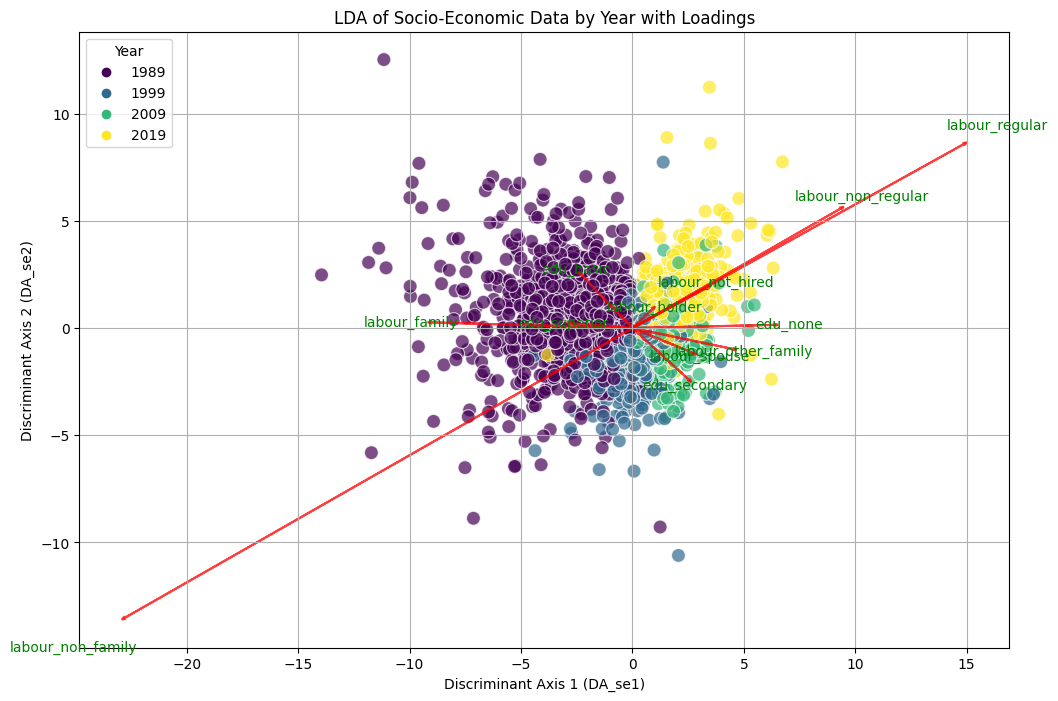

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame with relevant columns

# Define socio-economic columns
socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['region_name', 'year'] + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the socio-economic data
scaler = StandardScaler()
data_filtered[socio_econ_columns] = scaler.fit_transform(data_filtered[socio_econ_columns])

# Prepare the data for LDA
X_se = data_filtered[socio_econ_columns]
y = data_filtered['year']

# Perform LDA
lda_se = LDA()
X_se_r2 = lda_se.fit_transform(X_se, y)

# Retrieve loadings (coefficients)
loadings_se = lda_se.coef_

# Add LDA scores to the original dataset
lda_df_se = pd.DataFrame(X_se_r2, columns=[f'DA_se{i+1}' for i in range(X_se_r2.shape[1])])
data_with_lda_scores = pd.concat([data_filtered.reset_index(drop=True), lda_df_se.reset_index(drop=True)], axis=1)

# Plot the first two LDA components for socio-economic data with loadings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DA_se1', y='DA_se2', hue='year', data=data_with_lda_scores, palette='viridis', s=100, alpha=0.7)

# Plot loadings as vectors
num_features_se = len(socio_econ_columns)
for i in range(num_features_se):
    # Scale the arrows for better visibility
    arrow_scale_se = 2.5  # Adjust this scaling factor as needed
    plt.arrow(0, 0, loadings_se[0, i]*arrow_scale_se, loadings_se[1, i]*arrow_scale_se, 
              color='r', alpha=0.75, linewidth=1.5, head_width=0.1)
    plt.text(loadings_se[0, i]*arrow_scale_se*1.1, loadings_se[1, i]*arrow_scale_se*1.1, 
             socio_econ_columns[i], color='g', ha='center', va='center')

plt.title('LDA of Socio-Economic Data by Year with Loadings')
plt.xlabel('Discriminant Axis 1 (DA_se1)')
plt.ylabel('Discriminant Axis 2 (DA_se2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


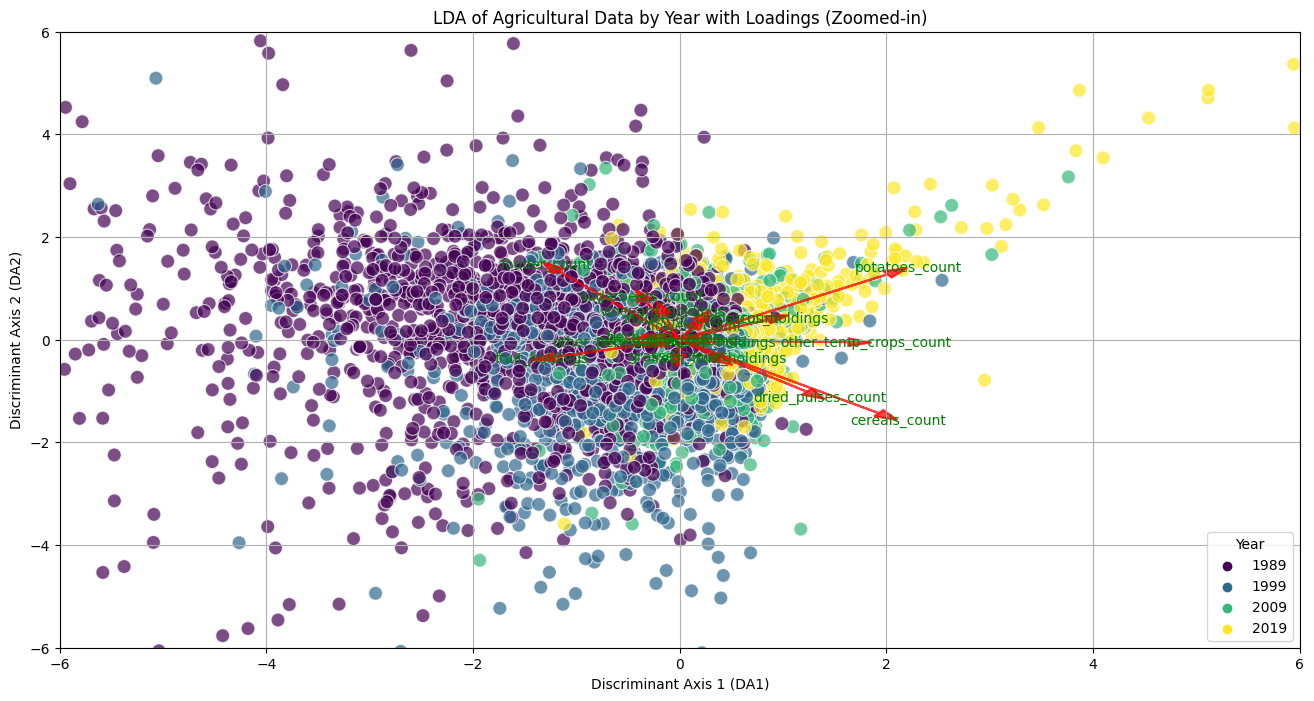

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame with relevant columns

# Define columns for temporary crops and permanent crops
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

# Filter the necessary columns
required_columns = ['region_name', 'year'] + temp_crop_columns + perm_crop_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the agricultural data
agricultural_columns = temp_crop_columns + perm_crop_columns
scaler = StandardScaler()
data_filtered[agricultural_columns] = scaler.fit_transform(data_filtered[agricultural_columns])

# Prepare the data for LDA
X_ag = data_filtered[agricultural_columns]
y = data_filtered['year']

# Perform LDA
lda_ag = LDA()
X_ag_r2 = lda_ag.fit_transform(X_ag, y)

# Retrieve loadings (coefficients)
loadings = lda_ag.coef_

# Add LDA scores to the original dataset
lda_df_ag = pd.DataFrame(X_ag_r2, columns=[f'DA{i+1}' for i in range(X_ag_r2.shape[1])])
data_with_lda_scores = pd.concat([data_filtered.reset_index(drop=True), lda_df_ag.reset_index(drop=True)], axis=1)

# Plot the first two LDA components for agricultural data with loadings
plt.figure(figsize=(16, 8))
sns.scatterplot(x='DA1', y='DA2', hue='year', data=data_with_lda_scores, palette='viridis', s=100, alpha=0.7)

# Plot loadings as vectors
num_features = len(agricultural_columns)
for i in range(num_features):
    # Scale the arrows for better visibility
    arrow_scale = 4.0  # Adjust this scaling factor as needed
    plt.arrow(0, 0, loadings[0, i]*arrow_scale, loadings[1, i]*arrow_scale, 
              color='r', alpha=0.75, linewidth=1.5, head_width=0.15)
    plt.text(loadings[0, i]*arrow_scale*1.1, loadings[1, i]*arrow_scale*1.1, 
             agricultural_columns[i], color='g', ha='center', va='center')

# Adjust plot limits for better visibility
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.title('LDA of Agricultural Data by Year with Loadings (Zoomed-in)')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame with relevant columns

# Define columns for temporary crops and permanent crops
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

# Define socio-economic columns
socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the agricultural and socio-economic data
scaler = StandardScaler()
data_filtered[temp_crop_columns + perm_crop_columns + socio_econ_columns] = scaler.fit_transform(data_filtered[temp_crop_columns + perm_crop_columns + socio_econ_columns])

# Prepare the data for LDA
X = data_filtered[temp_crop_columns + perm_crop_columns]  # Features: agricultural activities
y = data_filtered[socio_econ_columns]  # Target: socio-economic variables

# Perform LDA
lda = LDA()
X_r2 = lda.fit_transform(X, y)

# Retrieve loadings (coefficients)
loadings = lda.coef_

# Add LDA scores to the original dataset
lda_df = pd.DataFrame(X_r2, columns=[f'DA{i+1}' for i in range(X_r2.shape[1])])
data_with_lda_scores = pd.concat([data_filtered.reset_index(drop=True), lda_df.reset_index(drop=True)], axis=1)

# Plot the first two LDA components for agricultural data with loadings
plt.figure(figsize=(16, 8))
sns.scatterplot(x='DA1', y='DA2', data=data_with_lda_scores, s=100, alpha=0.7)

# Plot loadings as vectors
num_features = len(temp_crop_columns + perm_crop_columns)
for i in range(num_features):
    # Scale the arrows for better visibility
    arrow_scale = 4.0  # Adjust this scaling factor as needed
    plt.arrow(0, 0, loadings[0, i]*arrow_scale, loadings[1, i]*arrow_scale, 
              color='r', alpha=0.75, linewidth=1.5, head_width=0.15)
    plt.text(loadings[0, i]*arrow_scale*1.1, loadings[1, i]*arrow_scale*1.1, 
             temp_crop_columns[i] if i < len(temp_crop_columns) else perm_crop_columns[i-len(temp_crop_columns)], 
             color='g', ha='center', va='center')

# Adjust plot limits for better visibility
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.title('LDA of Agricultural Activities by Socio-Economic Variables with Loadings')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.grid(True)
plt.show()


ValueError: y should be a 1d array, got an array of shape (11528, 12) instead.

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame with relevant columns

# Define columns for education
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = edu_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the data
scaler = StandardScaler()
data_filtered[edu_columns] = scaler.fit_transform(data_filtered[edu_columns])

# Prepare the data for LDA
X_edu = data_filtered[edu_columns]
y_edu = data_filtered.index  # Use index as a dummy target (not meaningful for LDA)

# Perform LDA
lda_edu = LDA()
X_edu_r2 = lda_edu.fit_transform(X_edu, y_edu)

# Retrieve loadings (coefficients)
loadings_edu = lda_edu.coef_

# Plot the first two LDA components for education data with loadings
plt.figure(figsize=(12, 8))

# Plot loadings as vectors
num_features_edu = len(edu_columns)
for i in range(num_features_edu):
    # Scale the arrows appropriately
    arrow_scale = 0.5  # Adjust this scaling factor as needed
    plt.arrow(0, 0, loadings_edu[0, i]*arrow_scale, loadings_edu[1, i]*arrow_scale, 
              color='r', alpha=0.75, linewidth=1.5, head_width=0.15)
    plt.text(loadings_edu[0, i]*arrow_scale*1.1, loadings_edu[1, i]*arrow_scale*1.1, 
             edu_columns[i], color='g', ha='center', va='center')

# Adjust plot limits for better visibility
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.title('LDA of Education Variables with Loadings')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.grid(True)
plt.show()


ValueError: The number of samples must be more than the number of classes.